# Color Palettes in Movies -- Filtering Pixels

_by Austin Poor_

Algorithmically finding color palettes from movie stills.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from skimage import color
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
import color_palettes

In [2]:
image_path = Path("stills/18 (795).jpg")
image = Image.open(image_path.open("rb"))

arr = np.array(image)
pixels = arr.reshape((-1,3))
pixels = pixels.astype("float32") / 255

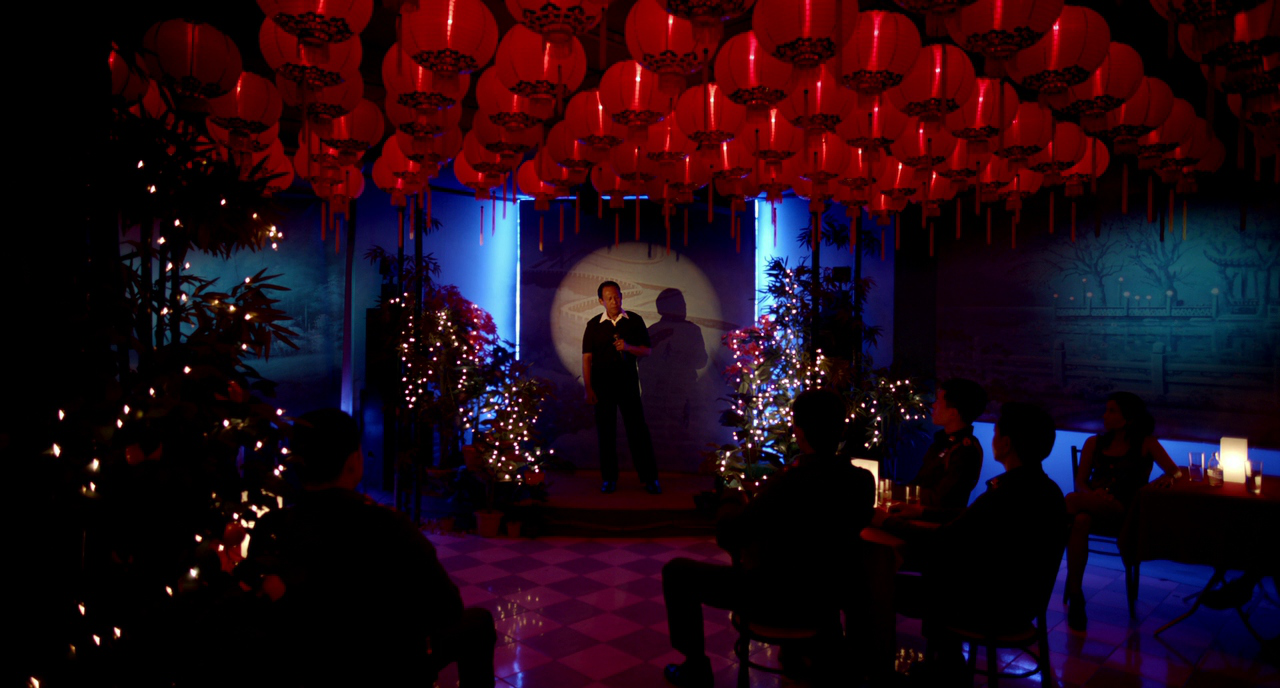

In [3]:
image

In [6]:
def read_image(path):
    with open(path,"rb") as f:
        return np.array(Image.open(f))

def preprocess_image(img):
    return img.reshape((-1,3)).astype("float32") / 255

def get_kmeans_centers(img,nclusters):
    return KMeans(n_clusters=nclusters).fit(img).cluster_centers_

def get_agglom_centers(img,nclusters):
    return AgglomerativeClustering(n_clusters=nclusters).fit(img).cluster_centers_

def plot_image(img):
    plt.figure(figsize=(14,8))
    plt.imshow(img)
    plt.grid()
    plt.axis('off')
    plt.show()

def plot_palette(centers):
    plt.figure(figsize=(14,6))
    plt.imshow(centers[
        np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,10)).T
    ])
    plt.grid()
    plt.axis('off')
    plt.show()

In [7]:
def rgb2hsv(dat):
    return color.rgb2hsv([dat])[0]

def hsv2rgb(dat):
    return color.hsv2rgb([dat])[0]

def preprocess_rgb(img):
    return img.reshape((-1,3)).astype("float32") / 255

def preprocess_hsv(img):
    return rgb2hsv(preprocess_rgb(img))

In [8]:
def make_all_palettes(path,nclusters=8):
    # Load the image
    img = read_image(path)
    
    # Reshape and set range
    rgb_pixels = preprocess_rgb(img)
    hsv_pixels = preprocess_hsv(img)
    
    # Cluster the pixels
    km_rgb_centers = get_kmeans_centers(rgb_pixels,nclusters)
    km_hsv_centers = get_kmeans_centers(hsv_pixels,nclusters)
    km_hsv_centers = hsv2rgb(km_hsv_centers)
    
    agglom_rgb_centers = get_kmeans_centers(rgb_pixels,nclusters)
    agglom_hsv_centers = get_kmeans_centers(hsv_pixels,nclusters)
    agglom_hsv_centers = hsv2rgb(agglom_hsv_centers)
    
    # Plot the image
    plot_image(img)
    
    # Plot the palette
    print("KMeans RGB clustering")
    plot_palette(km_rgb_centers)
    print("KMeans HSV clustering")
    plot_palette(km_hsv_centers)
    
    print("Agglomerative RGB clustering")
    plot_palette(agglom_rgb_centers)
    print("Agglomerative HSV clustering")
    plot_palette(agglom_hsv_centers)
    
    print("\n" + "=" * 100 + "\n")

KMeans + Agglomerative clustering for RGB + HSV with 8 centers...
-----------------------------------------------------------------

Image: stills/09 (776).jpg


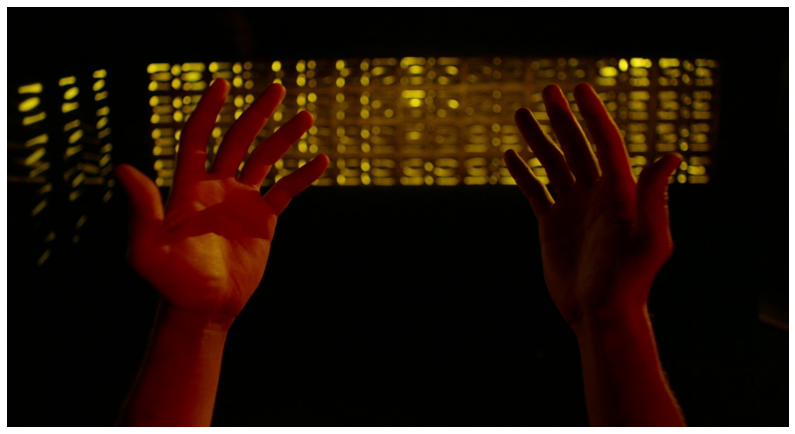

KMeans RGB clustering


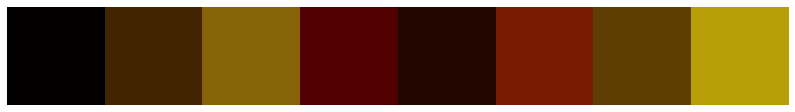

KMeans HSV clustering


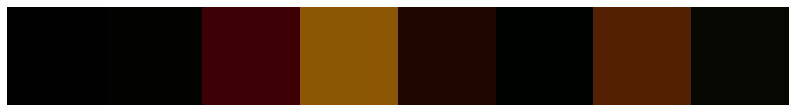

Agglomerative RGB clustering


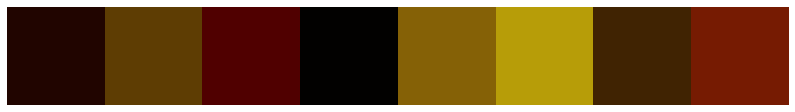

Agglomerative HSV clustering


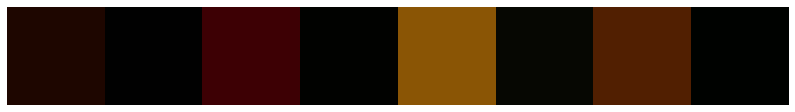



Image: stills/13 (795).jpg


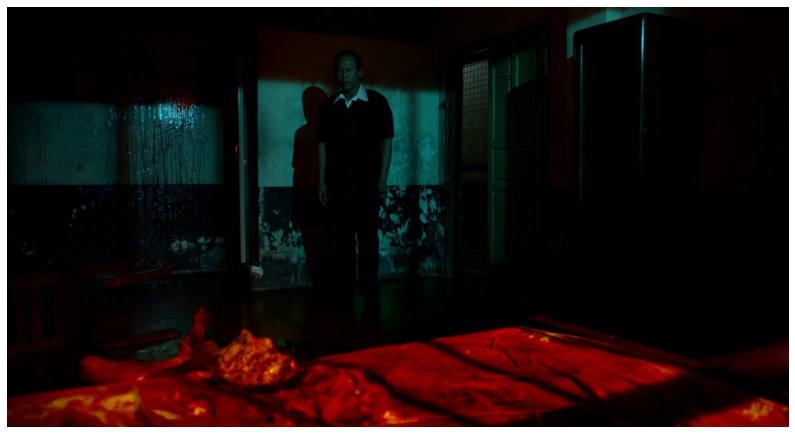

KMeans RGB clustering


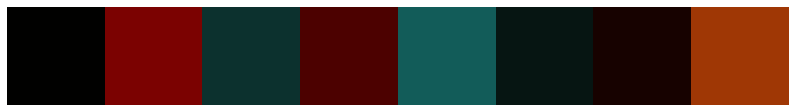

KMeans HSV clustering


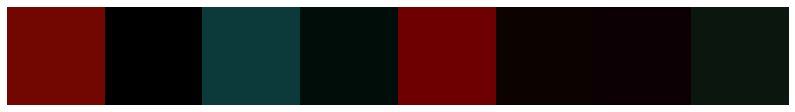

Agglomerative RGB clustering


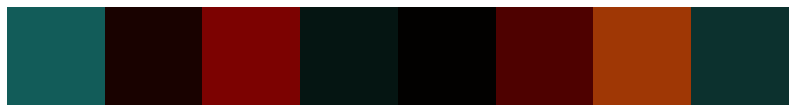

Agglomerative HSV clustering


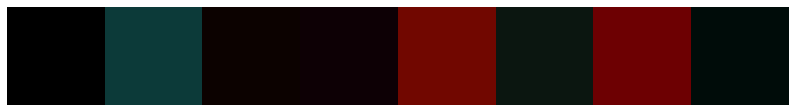



Image: stills/18 (795).jpg


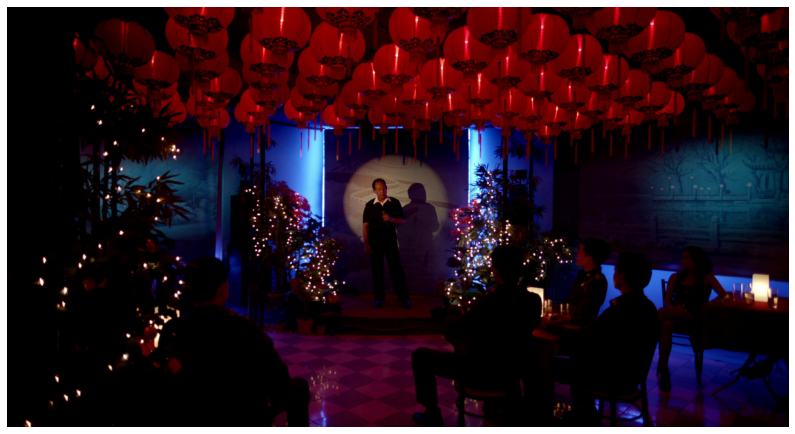

KMeans RGB clustering


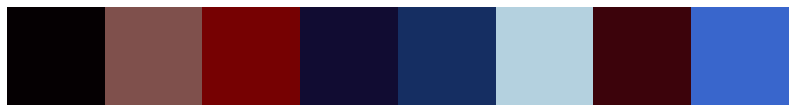

KMeans HSV clustering


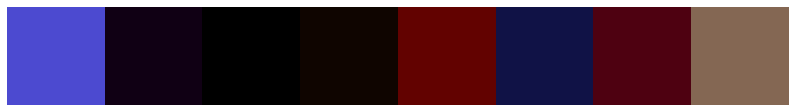

Agglomerative RGB clustering


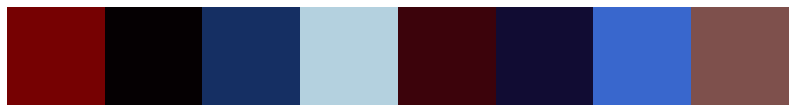

Agglomerative HSV clustering


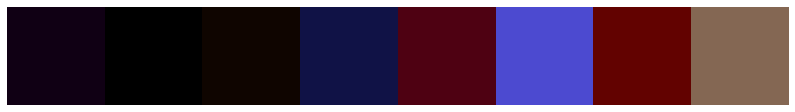



Image: stills/03 (776).jpg


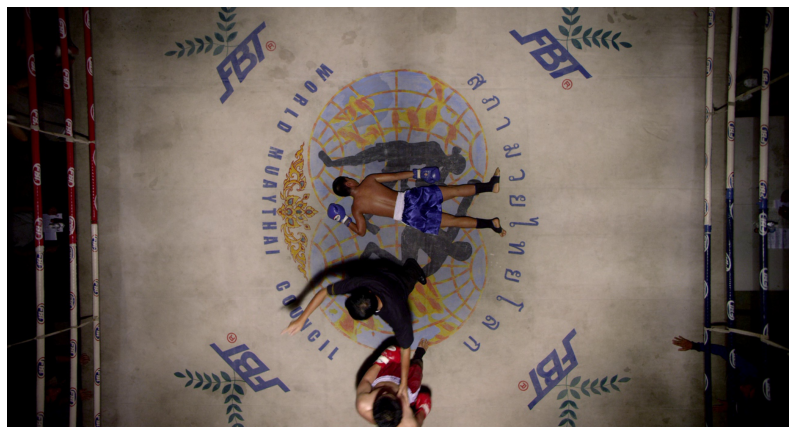

KMeans RGB clustering


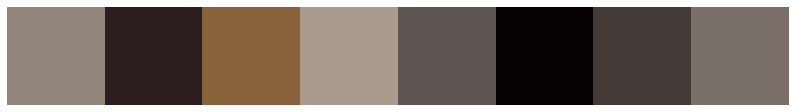

KMeans HSV clustering


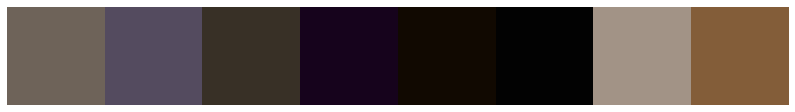

Agglomerative RGB clustering


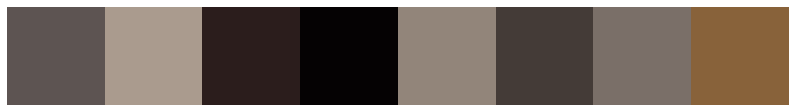

Agglomerative HSV clustering


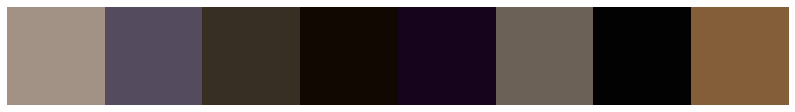



Image: stills/11 (795).jpg


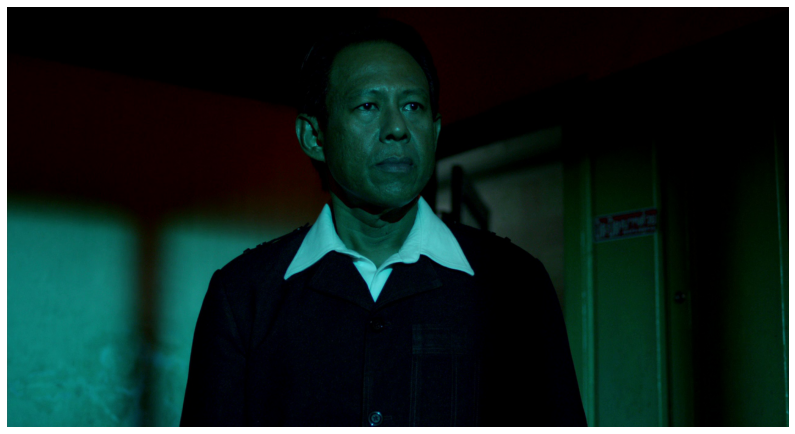

KMeans RGB clustering


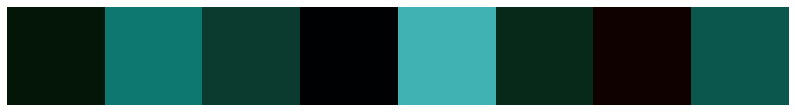

KMeans HSV clustering


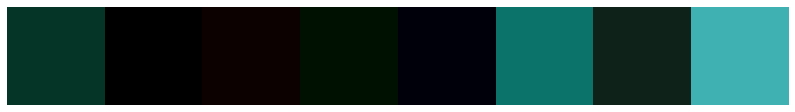

Agglomerative RGB clustering


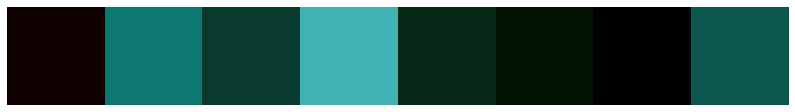

Agglomerative HSV clustering


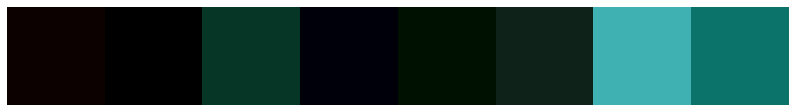

In [10]:
print("KMeans + Agglomerative clustering for RGB + HSV with 8 centers...")
print("-" * 65 + "\n")
for img_path in Path("stills").glob("*.jpg"):
    print("Image:",img_path)
    make_all_palettes(img_path)